<a href="https://colab.research.google.com/github/Sidy3143/Generative-ai/blob/main/VAE_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training a VAE with Convolutional layers.

We take the linear-VAE, and replace linear layers we Convolutional ones.

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

dataloader = torch.utils.data.DataLoader(dataset=mnist, batch_size=128, shuffle=True)

In [ ]:
class Vae(nn.Module):
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(Vae, self).__init__()

    self.encoder = nn.Sequential( # batch_size, 28, 28
        nn.Conv2d(1, 16, 3, stride=2, padding=1), # batch_size, 16, 14, 14
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride=2, padding=1), # batch_size, 32, 7, 7
        nn.ReLU(),
        nn.Flatten() # batch_size, 32*7*7 -- flattend starting by dim=1 (32)
    )

    self.mu = nn.Linear(32*7*7, latent_dim)
    self.sigma = nn.Linear(32*7*7, latent_dim)

    self.decoder = nn.Sequential(
        nn.Linear(latent_dim, 32*7*7),
        nn.Unflatten(1, (32, 7, 7)), # 1 --> dim by which we flattened (dim 1 - 32)
        nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # 14, 14
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),   #28, 28
        nn.Sigmoid()
    )

  def encode(self, x):
    h = self.encoder(x)
    mu, sigma = self.mu(h), self.sigma(h)

    return mu, sigma

  def reparameterize(self, mu, sigma):
    epsilon = torch.randn_like(sigma)
    z = mu + sigma * epsilon

    return z

  def decode(self,z):
    reconstructed = self.decoder(z)

    return reconstructed

  def forward(self, x):
    mu, sigma = self.encode(x)

    z = self.reparameterize(mu, sigma)

    reconstructed = self.decode(z)

    return reconstructed, mu, sigma

In [ ]:
input_dim = 784
hidden_dim = 200
latent_dim = 16
lr= 1e-3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = Vae(input_dim, hidden_dim, latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss(reduction="sum")

cuda


In [ ]:
def trainning(input_dim=input_dim, device=device, epochs=20):
  generated = []
  for epoch in range(epochs):
    total_loss = 0
    loop = tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch:, {epoch} / {epochs}")
    for n, (images, _) in loop:
      images = images.to(device)
      reconstructed, mu, sigma = model(images)

      loss = criterion(reconstructed, images)
      kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
      batch_loss = (loss + kl_div) / images.shape[0]

      optimizer.zero_grad()
      batch_loss.backward()
      optimizer.step()

      total_loss += batch_loss
      loop.set_postfix(loss=batch_loss.item())
    avg_loss = total_loss / len(dataloader)
    print(f"Epoch: {epoch} avg_loss: {avg_loss:.4f}")
  generated.append(reconstructed)
  return avg_loss, generated

In [ ]:
avg_loss, generated = trainning()

Epoch:, 0 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.68it/s, loss=120]


Epoch: 0 avg_loss: 122.6745


Epoch:, 1 / 20: 100%|██████████| 469/469 [00:08<00:00, 56.97it/s, loss=122]


Epoch: 1 avg_loss: 122.6382


Epoch:, 2 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.62it/s, loss=120]


Epoch: 2 avg_loss: 122.6264


Epoch:, 3 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.07it/s, loss=123]


Epoch: 3 avg_loss: 122.5822


Epoch:, 4 / 20: 100%|██████████| 469/469 [00:08<00:00, 55.02it/s, loss=122]


Epoch: 4 avg_loss: 122.5297


Epoch:, 5 / 20: 100%|██████████| 469/469 [00:08<00:00, 55.73it/s, loss=123]


Epoch: 5 avg_loss: 122.5401


Epoch:, 6 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.26it/s, loss=121]


Epoch: 6 avg_loss: 122.4848


Epoch:, 7 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.80it/s, loss=121]


Epoch: 7 avg_loss: 122.4842


Epoch:, 8 / 20: 100%|██████████| 469/469 [00:08<00:00, 57.25it/s, loss=125]


Epoch: 8 avg_loss: 122.4586


Epoch:, 9 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.45it/s, loss=121]


Epoch: 9 avg_loss: 122.4323


Epoch:, 10 / 20: 100%|██████████| 469/469 [00:08<00:00, 52.45it/s, loss=118]


Epoch: 10 avg_loss: 122.4570


Epoch:, 11 / 20: 100%|██████████| 469/469 [00:08<00:00, 54.07it/s, loss=126]


Epoch: 11 avg_loss: 122.4442


Epoch:, 12 / 20: 100%|██████████| 469/469 [00:08<00:00, 56.38it/s, loss=122]


Epoch: 12 avg_loss: 122.3124


Epoch:, 13 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.22it/s, loss=121]


Epoch: 13 avg_loss: 122.3335


Epoch:, 14 / 20: 100%|██████████| 469/469 [00:09<00:00, 48.76it/s, loss=122]


Epoch: 14 avg_loss: 122.2802


Epoch:, 15 / 20: 100%|██████████| 469/469 [00:08<00:00, 56.71it/s, loss=124]


Epoch: 15 avg_loss: 122.3668


Epoch:, 16 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.26it/s, loss=121]


Epoch: 16 avg_loss: 122.3601


Epoch:, 17 / 20: 100%|██████████| 469/469 [00:08<00:00, 53.02it/s, loss=126]


Epoch: 17 avg_loss: 122.3305


Epoch:, 18 / 20: 100%|██████████| 469/469 [00:08<00:00, 52.98it/s, loss=122]


Epoch: 18 avg_loss: 122.2772


Epoch:, 19 / 20: 100%|██████████| 469/469 [00:08<00:00, 56.73it/s, loss=121]

Epoch: 19 avg_loss: 122.3040


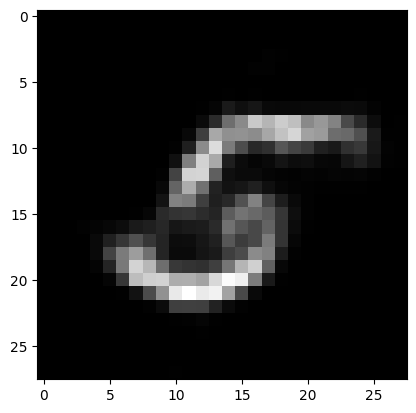

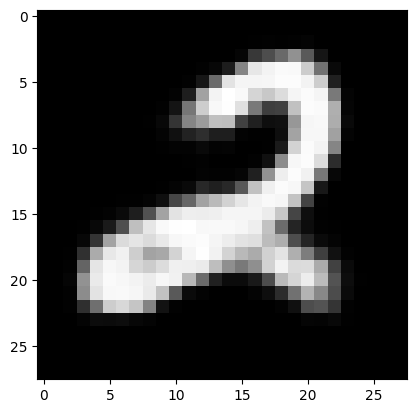

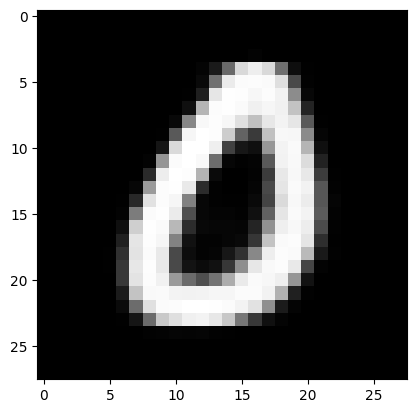

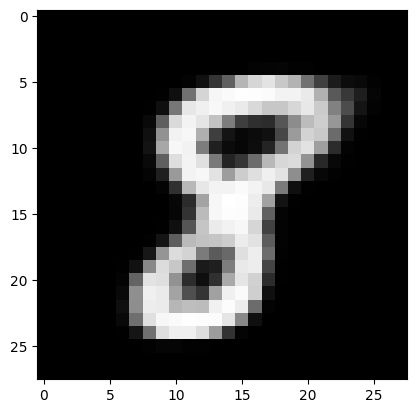

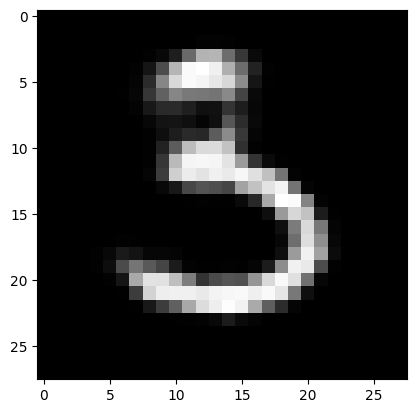

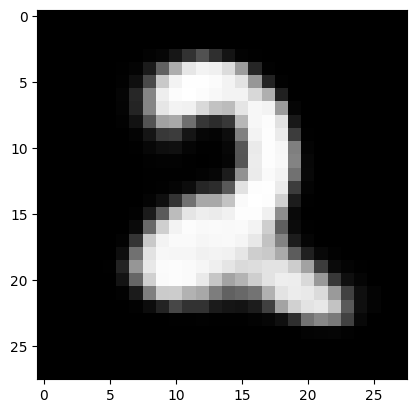

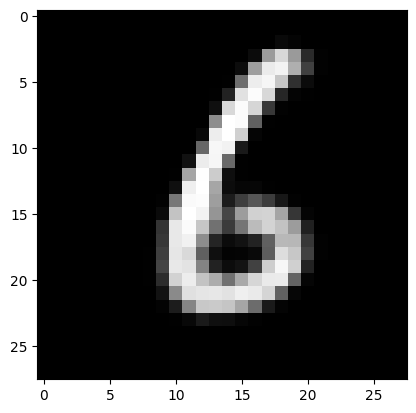

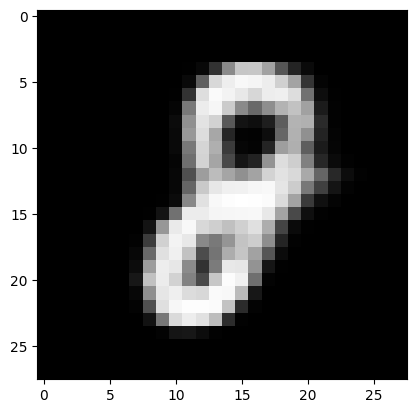

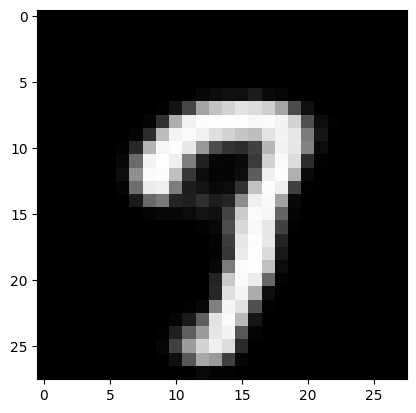

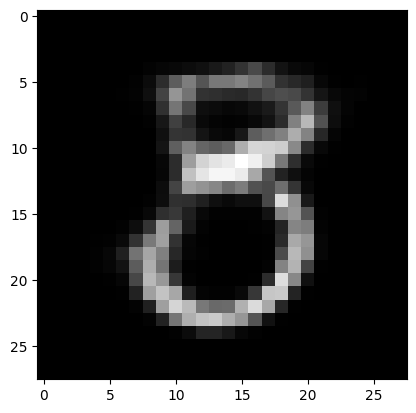

In [ ]:
# plot images
# generated[0] --> 96, 1, 28, 28
id = 0
for image in generated[0]: # image --> 1, 28, 28
  image = image.squeeze(0).cpu().detach().numpy()
  plt.imshow(image, cmap="gray")
  plt.show()
  id += 1
  if id == 10:
    break

We can see that wee have much better images than linear VAE

In [ ]:
# inference
def reconstruction(images, model):
  with torch.no_grad():
     images = images.to(device)

     reconstructed, mu, sigma = model(images)

  img = images.squeeze(1).cpu().detach().numpy()
  recon = reconstructed.squeeze(1).cpu().detach().numpy()

  for i in range(10):
    plt.figure(figsize=(9, 2))
    plt.subplot(1, 2, 1)

    plt.imshow(img[i], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(recon[i], cmap="gray")
    plt.show()

Also better reconstruction

torch.Size([10, 1, 28, 28])


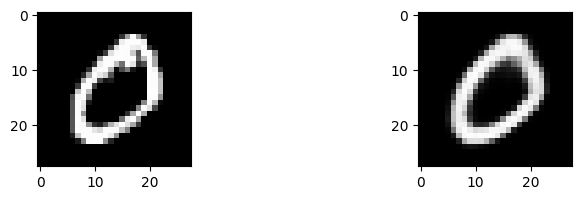

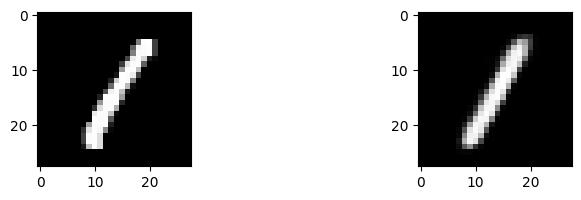

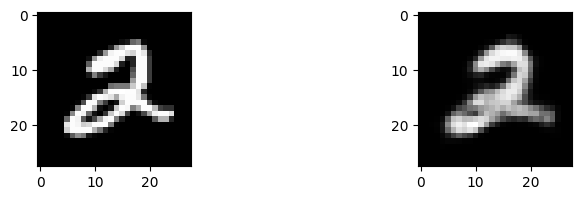

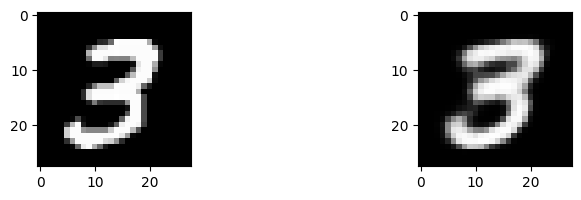

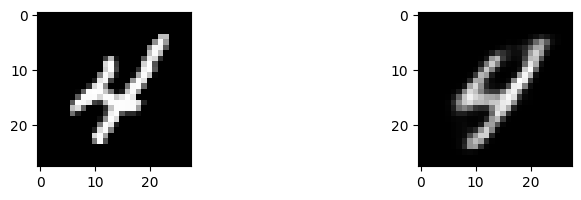

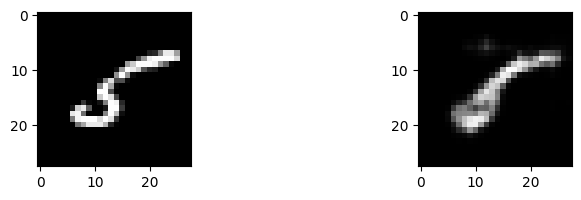

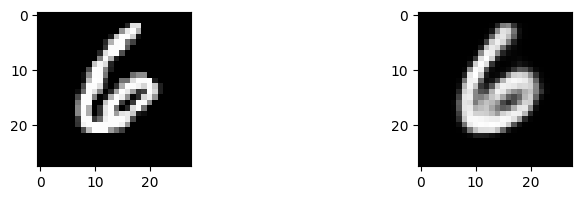

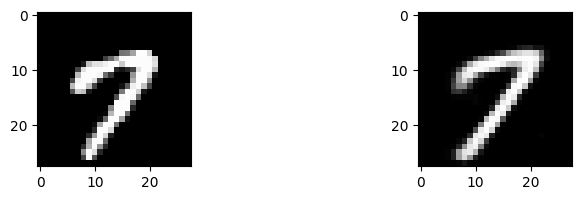

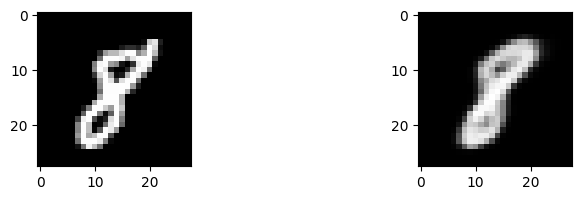

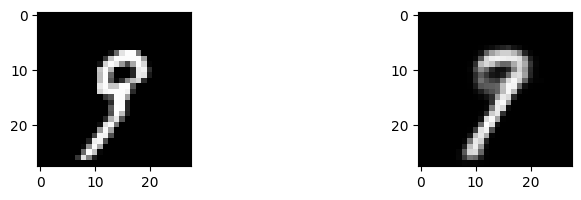

In [ ]:
#exemple reconstruction
import numpy as np
idx = 0
digits = []
for image, label in mnist:
   if label == idx:
     digits.append(image)
     idx+=1
   if idx==10:
    break

digits = np.array(digits)
digits = torch.tensor(digits)
print(digits.shape)
reconstruction(digits, model)

Hyperparameter search if you optimal hyper parameters.

In [ ]:
!pip install optuna

In [ ]:
import optuna

def objective(trial):
  latent_dim = trial.suggest_categorical("latent_dim", [16, 20, 32, 64])

  loss = trainning(epochs=5)
  return loss
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("best params : ", study.best_params)